### Three story steel building with rigid beam-column connections and W-section

In [70]:
from openseespy.opensees import *
import opsvis as opsv
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib widget

In [71]:
wipe()
model('basic', '-ndm', 2, '-ndf', 3)

In [72]:
# UNITS
# Base Units
inch = 1
kip = 1
sec = 1
# Units to derived
sq_inch = inch * inch
ksi = kip / sq_inch
ft = 12 * inch
g = 386.2 * inch / (sec ** 2)
pi = np.pi

In [73]:
# DIMENSIONS
h_story = 10*ft
w_bayX = 15*ft

In [74]:
# Material
# Steel02 material => uniaxialMaterial('Steel02', matTag, Fy, E0, b, *params, a1=a2*Fy/E0, a2=1.0, a3=a4*Fy/E0, a4=1.0, sigInit=0.0)
matTag = 1; Fy = 60.0*ksi; E0 = 29000.0*ksi; b = 0.10; params=[18.0, 0.0925, 0.15] # [R0,cR1,cR2]
a2 = 1.0
a1 = a2*Fy/E0
a4 = 1.0
a3 = a4*Fy/E0
uniaxialMaterial('Steel02', matTag, Fy, E0, b, *params, a1, a2, a3, a4, 0.0)

In [75]:
# Define wide flange section => section('WFSection2d', secTag, matTag, d, tw, bf, tf, Nfw, Nff)
section('WFSection2d', 1, 1, 10.5*inch, 0.26*inch, 5.77*inch, 0.44*inch, 15, 16) # Outer column
section('WFSection2d', 2, 1, 10.5*inch, 0.26*inch, 5.77*inch, 0.44*inch, 15, 16) # Inner column


section('WFSection2d', 3, 1, 8.3*inch, 0.44*inch, 8.11*inch, 0.685*inch, 15, 15) # Outer beam
section('WFSection2d', 4, 1, 8.2*inch, 0.40*inch, 8.01*inch, 0.650*inch, 15, 15) # Inner beam
section('WFSection2d', 5, 1, 8.0*inch, 0.40*inch, 7.89*inch, 0.600*inch, 15, 15) # Inner beam

In [76]:
# Nodes
# Create All main nodes
node(1, 0.0, 0.0)
node(2, w_bayX, 0.0)
node(3, 2*w_bayX, 0.0)

node(11, 0.0, h_story)
node(12, w_bayX, h_story)
node(13, 2*w_bayX, h_story)

node(21, 0.0, 2*h_story)
node(22, w_bayX, 2*h_story)
node(23, 2*w_bayX, 2*h_story)

node(31, 0.0, 3*h_story)
node(32, w_bayX, 3*h_story)
node(33, 2*w_bayX, 3*h_story)

In [77]:
# Beam Connection nodes
node(1101, 0.0, h_story)
node(1201, w_bayX, h_story)
node(1202, w_bayX, h_story)
node(1301, 2*w_bayX, h_story)

node(2101, 0.0, 2*h_story)
node(2201, w_bayX, 2*h_story)
node(2202, w_bayX, 2*h_story)
node(2301, 2*w_bayX, 2*h_story)

node(3101, 0.0, 3*h_story)
node(3201, w_bayX, 3*h_story)
node(3202, w_bayX, 3*h_story)
node(3301, 2*w_bayX, 3*h_story)

In [78]:
# Fix restraints at base
fix(1, 1, 1, 1)
fix(2, 1, 1, 1)
fix(3, 1, 1, 1)

<Axes: >

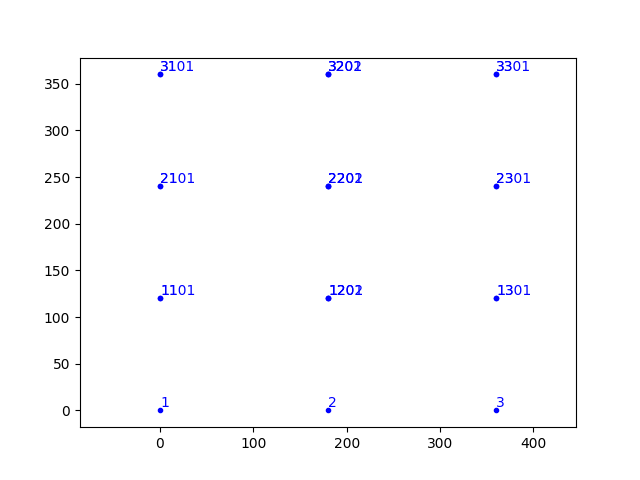

In [79]:
opsv.plot_model()

In [80]:
# ADD COLUMNS => element('forceBeamColumn', eleTag, *eleNodes, transfTag, integrationTag, '-iter', maxIter=10, tol=1e-12, '-mass', mass=0.0)
# Integration points => beamIntegration('Lobatto', tag, secTag, N)
beamIntegration('Lobatto', 1, 1, 4)
beamIntegration('Lobatto', 2, 2, 4)
geomTransf('PDelta', 1)
element('forceBeamColumn', 1, *[1,11], 1, 1, '-mass', 0.0) # outer column
element('forceBeamColumn', 2, *[2,12], 1, 2, '-mass', 0.0) # inner column
element('forceBeamColumn', 3, *[3,13], 1, 1, '-mass', 0.0) # outer column

element('forceBeamColumn', 11, *[11,21], 1, 1, '-mass', 0.0) # outer column
element('forceBeamColumn', 12, *[12,22], 1, 2, '-mass', 0.0) # inner column
element('forceBeamColumn', 13, *[13,23], 1, 1, '-mass', 0.0) # outer column

element('forceBeamColumn', 21, *[21,31], 1, 1, '-mass', 0.0) # outer column
element('forceBeamColumn', 22, *[22,32], 1, 2, '-mass', 0.0) # inner column
element('forceBeamColumn', 23, *[23,33], 1, 1, '-mass', 0.0) # outer column

<Axes: >

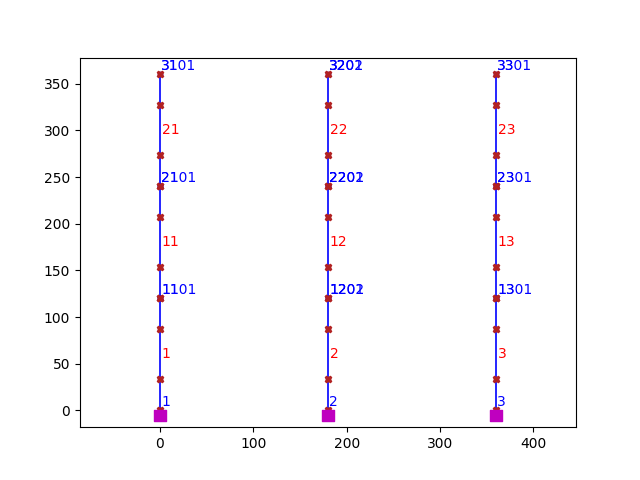

In [81]:
opsv.plot_model()

In [82]:
# ADD BEAMS => element('forceBeamColumn', eleTag, *eleNodes, transfTag, integrationTag, '-iter', maxIter=10, tol=1e-12, '-mass', mass=0.0)
# Integration points => beamIntegration('Lobatto', tag, secTag, N)
beamIntegration('Lobatto', 3, 3, 4)  # Top (Outer)
beamIntegration('Lobatto', 4, 4, 4)  # Middle (Inner)
beamIntegration('Lobatto', 5, 5, 4)  #  Bottom (Inner)
geomTransf('Linear', 2)
# Bottom beam
element('forceBeamColumn', 101, *[1101, 1201], 2, 5, '-mass', 0.0)
element('forceBeamColumn', 102, *[1202, 1301], 2, 5, '-mass', 0.0)
# Middle beam
element('forceBeamColumn', 201, *[2101, 2201], 2, 4, '-mass', 0.0)
element('forceBeamColumn', 202, *[2202, 2301], 2, 4, '-mass', 0.0)
# Top Beam
element('forceBeamColumn', 301, *[3101, 3201], 2, 3, '-mass', 0.0)
element('forceBeamColumn', 302, *[3202, 3301], 2, 3, '-mass', 0.0)

<Axes: >

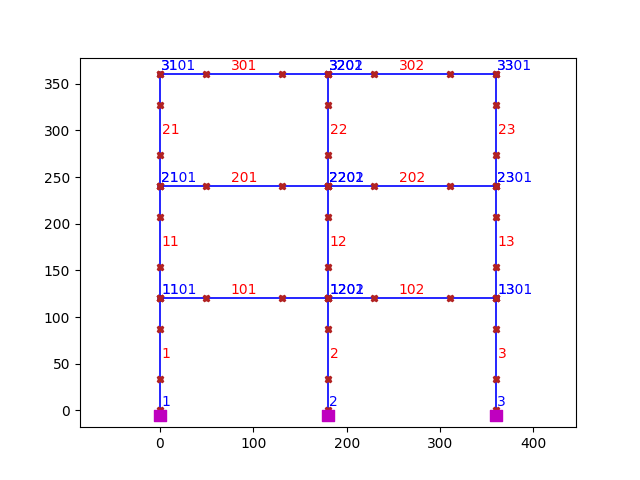

In [83]:
opsv.plot_model()

In [84]:
# Assign rigid connection between beam and column using mp constraint => equalDOF(rNodeTag, cNodeTag, *dofs)¶
equalDOF(11, 1101, 1,2,3)
equalDOF(12, 1201, 1,2,3)
equalDOF(12, 1202, 1,2,3)
equalDOF(13, 1301, 1,2,3)

equalDOF(21, 2101, 1,2,3)
equalDOF(22, 2201, 1,2,3)
equalDOF(22, 2202, 1,2,3)
equalDOF(23, 2301, 1,2,3)

equalDOF(31, 3101, 1,2,3)
equalDOF(32, 3201, 1,2,3)
equalDOF(32, 3202, 1,2,3)
equalDOF(33, 3301, 1,2,3)

In [85]:
# STAGE 1: APPLY GRAVITY LOAD
timeSeries('Linear', 1)
pattern('Plain', 1, 1)

# loads
load(11, 0.0, -5.0*kip, 0.0)
load(12, 0.0, -6.0*kip, 0.0)
load(13, 0.0, -5.0*kip, 0.0)

load(21, 0., -5.0*kip, 0.0)
load(22, 0., -6.0*kip,0.0)
load(23, 0., -5.0*kip, 0.0)

load(31, 0., -5.0*kip, 0.0)
load(32, 0., -6.0*kip, 0.0)
load(33, 0., -5.0*kip, 0.0)

In [86]:
# Gravity analysis setip
system("BandGEN")
numberer("Plain")
constraints("Plain")
integrator("LoadControl", 0.1)
algorithm("Newton")
test('NormUnbalance',1e-8, 10)
analysis("Static")

ok = analyze(10)
if ok == 0:
    print("Gravity analysis successfully completed!")

loadConst('-time', 0.0)
wipeAnalysis()

Gravity analysis successfully completed!


In [87]:
# PERFORM PUSHOVER ANALYSIS

pattern("Plain", 2, 1)

load(11, 1.61, 0.0, 0.0)
load(21, 3.22, 0.0, 0.0)
load(31, 4.83, 0.0, 0.0)

In [88]:
# Apply lateral displacement 

maxDisp = 1.5*ft   # 15% of h_story = 18 inch
DispIncr = 0.01*ft
NSteps = int(maxDisp/DispIncr)

system("ProfileSPD")
numberer("Plain")
constraints("Plain")
# integrator("DisplacementControl", ControlNode, ControlDOF, DispIncr)
integrator("DisplacementControl", 31, 1, DispIncr)
algorithm("Newton")
# test('NormUnbalance', tol, iter)
test('NormUnbalance',1e-8, 10)
analysis("Static")

In [89]:
dir_name = r"PushoverData"
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
# recorder('Node', '-file', filename, '-xml', filename, '-binary', filename, '-tcp', inetAddress, port, '-precision', nSD=6, '-timeSeries', tsTag, '-time', '-dT', deltaT=0.0, '-closeOnWrite', '-node', *nodeTags=[], '-nodeRange', startNode, endNode, '-region', regionTag, '-dof', *dofs=[], respType)
recorder('Node', '-file', "PushoverData/Node1Reaction.out", '-closeOnWrite', '-node', 1, '-dof', 1, 'reaction')
recorder('Node', '-file', "PushoverData/Node2Reaction.out", '-closeOnWrite', '-node', 2, '-dof', 1, 'reaction')
recorder('Node', '-file', "PushoverData/Node3Reaction.out", '-closeOnWrite', '-node', 3, '-dof', 1, 'reaction')
recorder('Node', '-file', "PushoverData/Node31Disp.out", '-closeOnWrite', '-node', 31, '-dof', 1, 'disp')

15

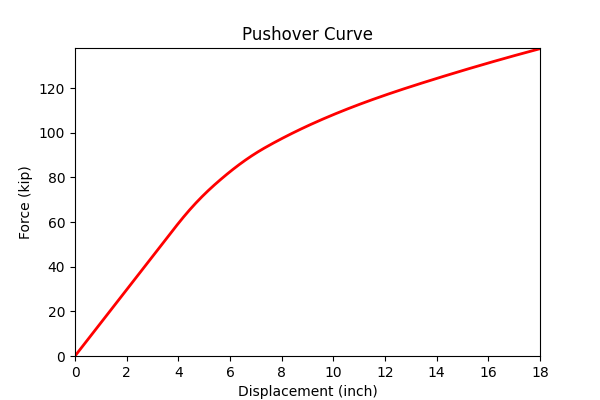

In [90]:
dataPush = np.zeros((NSteps+1, 2))

currentDisp = 0.0
ok = 0
step = 1
while ok == 0 and currentDisp < maxDisp:
    ok = analyze(1)
    currentDisp = nodeDisp(31,1)
    dataPush[step, 0] = currentDisp
    reactions()
    base_reaction = nodeReaction(1,1)+nodeReaction(2,1)+nodeReaction(3,1)
    dataPush[step, 1] = -base_reaction
    step += 1

# Plotting the pushover curve
plt.figure(figsize=(6,4))
plt.plot(dataPush[:,0], dataPush[:, 1], color='r', linewidth = 2)
plt.xlabel("Displacement (inch)")
plt.ylabel("Force (kip)")
plt.xlim(0, round(max(dataPush[:, 0]), 0))
plt.ylim(0, round(max(dataPush[:, 1]), 0))
plt.title("Pushover Curve")
plt.show()